# Pretrained PyTorch fasterrcnn resnet50 object detection cv model

This notebook will 
1. load the pre-trained PyTorch Fasterrcnn resnet50 object detection computer vision model 
1. run inference with a sample input image and detect objects and their bounding boxes based on the COCO label set
1. display on the image the bounding boxes, the coco classification, the confidence in the classification

It will use the Wallaroo CVDemo class to perform the opencv imaging tasks

### Import Packages

### Install these dependencies for OpenCV

You will need to ensure these opencv dependancies are installed.  Might need to do it as root

sudo apt-get update

sudo apt-get install ffmpeg libsm6 libxext6  -y

In [1]:
!pip install torchvision
!pip install torch
!pip install opencv-python
!pip install onnx
!pip install onnxruntime
!pip install imutils
!pip install pytz
!pip install ipywidgets

from torchvision.models import detection
from torchvision.models.detection import fasterrcnn_resnet50_fpn_v2
import matplotlib.pyplot as plt
import os
import pickle
import torch
import cv2
from PIL import Image
import numpy as np

import sys
 
# setting path
sys.path.append('..')



### Initialize some Vars

Initialize the COCO Classes, meaning the classificaitons found on the images and the default width and height all images are resized to

In [2]:
from CVDemoUtils import CVDemo

# The size the image will be resized to
width = 640
height = 480

# Only objects that have a confidence > confidence_target will be displayed on the image
confidence_target = 0.75

cvDemo = CVDemo()
cvDemo.COCO_CLASSES_PATH = "../models/coco_classes.pickle"


### Define the computer vision models we will be using

### Load, Test, and Save the resnet 50 model

Load the model and put it into evaluation mode

In [3]:
model = detection.fasterrcnn_resnet50_fpn(pretrained=True, progress=False, num_classes=len(cvDemo.getCocoClasses()), pretrained_backbone=True).to(cvDemo.DEVICE)
model.eval()
print("")


/opt/conda/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/opt/conda/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained_backbone' is deprecated since 0.13 and may be removed in the future, please use 'weights_backbone' instead.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight en

Use the CVDemo class to run inference on the model using the image provided and display the detected objects and bounding boxes who have a confidence > confidence target

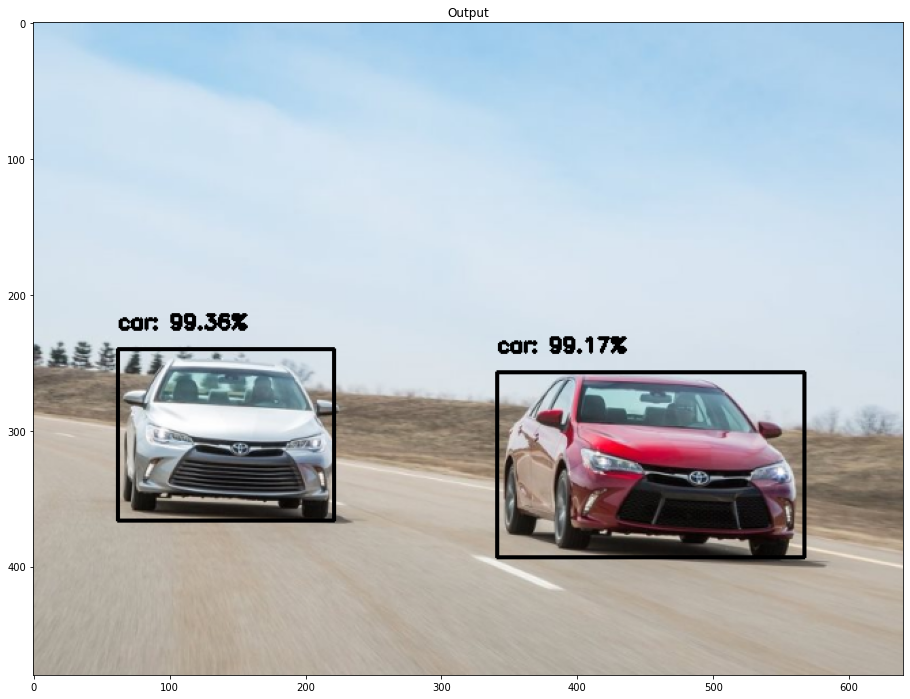

In [6]:

cvDemo.detectAndClassifyObjectsWithPytorchModel('../data/images/input/example/example_01.jpg', model, width, height, confidence_target)



Save the torch model so we can convert it to onnx

In [8]:
torch.save(model,"../models/frcnn-resnet.pt")